# 케라스 텍스트 처리 및 임베딩

- 코드 참조: 케라스 창시자에게 배우는 딥러닝



## 용어 설명

- `토큰(token)`
  - 텍스트를 나누는 단위

  - 토큰화(tokenization): 토큰으로 나누는 작업

- `n-gram`
  - 문장에서 추출한 N개(또는 그 이하)의 연속된 단어 그룹

  - 같은 개념이 '문자'에도 적용가능

  <img src="https://www.sqlservercentral.com/wp-content/uploads/legacy/0bf6a2bd621db172dba029ce3c712280a3f6aab3/29444.jpg">

  <sub>출처: https://www.sqlservercentral.com/articles/nasty-fast-n-grams-part-1-character-level-unigrams</sub>

## 문자 수준 원-핫 인코딩

In [1]:
import numpy as np

In [2]:
samples = ['The cat sat on the mat.',
          'The dog ate my homeworks.']

token_index = {}

In [3]:
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1

max_len = 10
results = np.zeros(shape = (len(samples), max_len,
                           max(token_index.values()) + 1))

In [4]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_len]:
        index = token_index.get(word)
        results[i, j, index] = 1.
        
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

## 케라스를 사용한 단어 수준 원-핫 인코딩

- `fit_on_texts()`

- `texts_to_sequences()`

- `texts_to_matrix()`

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [7]:
samples = ['The cat sat on the mat.',
          'The dog ate my homeworks.']

tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples)

# 텍스트를 sequence형태로 변환
sequences = tokenizer.texts_to_sequences(samples)

# one-hot
ohe_results = tokenizer.texts_to_matrix(samples, mode = 'binary')

word_index = tokenizer.word_index
print(len(word_index))

9


In [8]:
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [11]:
print(ohe_results.shape)
print(ohe_results)

(2, 1000)
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [10]:
word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homeworks': 9}

### 토큰화 예제

- `OOV` : Out of Vocabulary
  - 새로운 문장에서 기존에 토큰화한 문장에 존재하지 않으면 OOV로 대체됨

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [13]:
samples = ["I'm the smartest student.",
          "I'm the best student."]

tokenizer = Tokenizer(num_words = 10, oov_token = '<OOV>')
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

binary_results = tokenizer.texts_to_matrix(samples, mode = 'binary')

print(tokenizer.word_index)

{'<OOV>': 1, "i'm": 2, 'the': 3, 'student': 4, 'smartest': 5, 'best': 6}


In [14]:
binary_results

array([[0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 1., 0., 0., 0.]])

테스트

In [15]:
test = ["I'm the fastest student."]
test_seq = tokenizer.texts_to_sequences(test)

In [16]:
print("word_index:", tokenizer.word_index)
print("Test Text:", test)
print("Test Sequence:", test_seq)

word_index: {'<OOV>': 1, "i'm": 2, 'the': 3, 'student': 4, 'smartest': 5, 'best': 6}
Test Text: ["I'm the fastest student."]
Test Sequence: [[2, 3, 1, 4]]


## 원-핫 단어 벡터와 단어 임베딩

- `원-핫 단어 벡터`
  - 데이터가 희소(sparse)

  - 고차원

- `단어 임베딩`
  - 밀집(dense)

  - 저차원

  <img src="https://freecontent.manning.com/wp-content/uploads/Chollet_DLfT_02.png" width="400">

  <sub>출처: https://freecontent.manning.com/deep-learning-for-text/</sub>

## 단어 임베딩
- 단어간 벡터사이의 **거리가 가까운**, 즉 비슷한 단어들끼리 임베딩

- 거리 외에 임베딩 공간의 특정 방향도 의미를 가질 수 있음

- 거리에 기반하여 단어간의 관계를 찾아낼 수 있음 >> 이 관계를 학습하는데 사용


<img src="https://miro.medium.com/max/3010/1*OEmWDt4eztOcm5pr2QbxfA.png">

<sub>출처: https://towardsdatascience.com/creating-word-embeddings-coding-the-word2vec-algorithm-in-python-using-deep-learning-b337d0ba17a8</sub>


## Embedding Layer

- 특정 단어를 나타내는 정수 인덱스를 밀집 벡터(dense vector)로 매핑하는 딕셔너리 레이어

- 입력: `(samples, sequence_length)`

- 출력: `(samples, sequnece_length, dim)`

In [17]:
from tensorflow.keras.layers import Embedding

In [18]:
embedding_layer = Embedding(1000, 64)
embedding_layer

## 예제 : IMDB 데이터

- 인터넷 영화 데이터베이스(Internet Movie Database)

- 양극단의 리뷰 5만개로 이루어진 데이터셋
  - 훈련데이터: 25,000개
  - 테스트데이터 : 25,000개

  <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQlk-f2SHB6-Vs3RWwIugMctsyEn2QVZWC5KQ&usqp=CAU">

- https://www.imdb.com/interfaces/

### module import

In [19]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten

### 데이터 로드

In [20]:
num_words = 1000
max_len = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


### 데이터 확인
- 긍정: 1
- 부정: 0

In [22]:
print(x_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [24]:
for i in range(10):
    if y_train[i] == 0:
        label = "부정"
    else:
        label = "긍정"
        
    print("Review Seq: {}\nLabel: {}".format(x_train[i], label))

Review Seq: [1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
Label: 긍정
Review Seq: [1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 715, 8, 118, 2, 14, 394, 20, 13, 119, 9

### (참고) IMDB 데이터셋에서 가장 많이 사용된 단어

In [33]:
word_index = {}

for key, val in imdb.get_word_index().items():
    word_index[val] = key
    
for i in range(1, 6):
    print(word_index[i])

1654784/1641221 [==============================] - 0s 0us/step
the
and
a
of
to


### 데이터 전처리
- 모든 데이터를 같은 길이로 맞추기

  - `pad_sequence()`
    - 데이터가 max_len보다 길면 데이터를 자름

    - 데이터가 길면 `padding` 설정
      - `pre`: 데이터 앞에 0으로 채움
      -  `post`: 데이터 뒤에 0으로 채움


- 모든 데이터(문장 하나하나)가 같은 길이로 맞추어야 `Embedding` 레이어를 사용할 수 있음

In [34]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [35]:
pad_x_train = pad_sequences(x_train, maxlen = max_len, padding = 'pre')
pad_x_test = pad_sequences(x_test, maxlen = max_len, padding = 'pre')

In [36]:
print(len(x_train[0]))
print(len(pad_x_train[0]))

## 218길이 >> 20개의 길이로 줄어듦

218
20


In [37]:
print(x_train[0])
print(pad_x_train[0])

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[ 65  16  38   2  88  12  16 283   5  16   2 113 103  32  15  16   2  19
 178  32]


### 모델 구성

In [38]:
model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32,
                   input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))    ## binary이기대문에 sigmoid 함수

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 32)            32000     
_________________________________________________________________
flatten (Flatten)            (None, 640)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 641       
Total params: 32,641
Trainable params: 32,641
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일 및 학습

In [39]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [40]:
history = model.fit(pad_x_train, y_train,
                    epochs = 10,
                   batch_size = 32,
                   validation_split = 0.2)

Epoch 1/10
625/625 [==============================] - 5s 5ms/step - loss: 0.6421 - acc: 0.6438 - val_loss: 0.5668 - val_acc: 0.7010
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.5135 - acc: 0.7462 - val_loss: 0.5281 - val_acc: 0.7306
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4776 - acc: 0.7695 - val_loss: 0.5285 - val_acc: 0.7302
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4561 - acc: 0.7794 - val_loss: 0.5321 - val_acc: 0.7336
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4349 - acc: 0.7952 - val_loss: 0.5372 - val_acc: 0.7252
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.4132 - acc: 0.8109 - val_loss: 0.5481 - val_acc: 0.7256
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3917 - acc: 0.8261 - val_loss: 0.5629 - val_acc: 0.7186
Epoch 8/10
625/625 [==============================] - 3s 5ms/step - loss: 0.

### 시각화

In [41]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [42]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

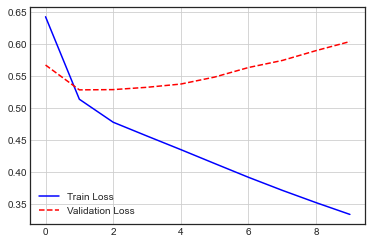

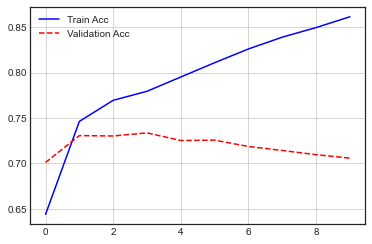

In [45]:
plt.plot(hist_dict['loss'], 'b-', label = 'Train Loss')
plt.plot(hist_dict['val_loss'], 'r--', label = 'Validation Loss')
plt.grid()
plt.legend()

plt.figure()
plt.plot(hist_dict['acc'], 'b-', label = 'Train Acc')
plt.plot(hist_dict['val_acc'], 'r--', label = 'Validation Acc')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [46]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.6040 - acc: 0.7072


[0.6040081977844238, 0.7072399854660034]

### 단어의 수를 늘린 후 재학습

In [47]:
num_words = 1000
max_len = 500

pad_x_train_2 = pad_sequences(x_train, maxlen = max_len, padding = 'pre')
pad_x_test_2 = pad_sequences(x_test, maxlen = max_len, padding = 'pre')

데이터 확인

In [49]:
print(x_train[0])
print(pad_x_train_2[0])

## 500을 채우고 나머지공간은 모두 0으로 채워짐

[1, 14, 22, 16, 43, 530, 973, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 2, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [51]:
model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32,
                   input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))    ## binary이기대문에 sigmoid 함수

model.summary()

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           32000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16001     
Total params: 48,001
Trainable params: 48,001
Non-trainable params: 0
_________________________________________________________________


In [52]:
history2 = model.fit(pad_x_train_2, y_train, 
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2)

## OverFitted : 99%(train) -- 83%(val)

Epoch 1/10
625/625 [==============================] - 3s 5ms/step - loss: 0.5167 - acc: 0.7368 - val_loss: 0.3601 - val_acc: 0.8490
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 0.3119 - acc: 0.8690 - val_loss: 0.3389 - val_acc: 0.8568
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2661 - acc: 0.8902 - val_loss: 0.3336 - val_acc: 0.8646
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 0.2257 - acc: 0.9104 - val_loss: 0.3540 - val_acc: 0.8580
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1880 - acc: 0.9305 - val_loss: 0.3629 - val_acc: 0.8548
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1503 - acc: 0.9490 - val_loss: 0.3865 - val_acc: 0.8502
Epoch 7/10
625/625 [==============================] - 3s 5ms/step - loss: 0.1188 - acc: 0.9636 - val_loss: 0.4213 - val_acc: 0.8434
Epoch 8/10
625/625 [==============================] - 3s 6ms/step - loss: 0.

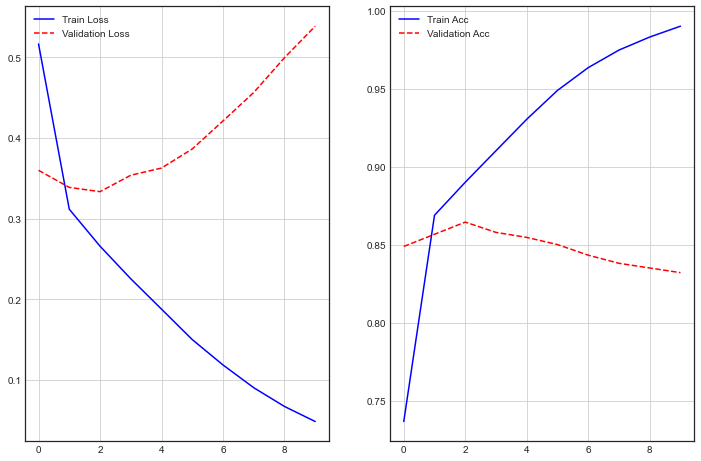

In [54]:
plt.figure(figsize = (12, 8))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], 'b-', label = 'Train Loss')
plt.plot(history2.history['val_loss'], 'r--', label = 'Validation Loss')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['acc'], 'b-', label = 'Train Acc')
plt.plot(history2.history['val_acc'], 'r--', label = 'Validation Acc')
plt.grid()
plt.legend()

plt.show()

In [55]:
model.evaluate(pad_x_test_2, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5175 - acc: 0.8330


[0.5175405144691467, 0.8330399990081787]

위의 결과도 나쁘지 않으나 과적합이 되는 이유
- 단어간 관계나 문장 구조 등 의미적 연결을 고려하지 않음

- 시퀀스 전체를 고려한 특성을 학습하는 것은 `Embedding`층 위에 `RNN`층이나 `1D 합성곱`을 추가하는 것이 좋음


## 단어 임베딩의 종류
- LSA

- Word2Vec

- GloVe

- FastText(from Facebook)

- etc..

<!-- ## 사전 훈련된 모델
https://github.com/Hironsan/awesome-embedding-models#pre-trained-word-vectors -->

## Word2Vec

- 2013년, Mikolov 와 동료들이 제안한 모형

- 분류 등과 같이 별도의 레이블이 없이 텍스트 자체만 있어도 학습이 가능

- Word2Vec의 방식  
  주변 단어의 관계를 이용

  - CBOW(continuous bag-of-words)
    - 주변단어의 임베딩을 더해서 대상단어를 예측

  - Skip-Gram
    - 대상 단어의 임베딩으로 주변단어를 예측

    - 일반적으로 CBOW보다 성능이 좋은 편

    - 한번에 여러 단어를 예측해야하기 때문에 비효율적  
      최근에는 **negative sampling**이라는 방법을 사용

  <img src="https://www.researchgate.net/publication/328160770/figure/fig14/AS:679665089925122@1539056193562/CBOW-and-Skip-Gram-neural-architectures.ppm">

  <sub>출처: https://www.researchgate.net/figure/CBOW-and-Skip-Gram-neural-architectures_fig14_328160770</sub>

### 구텐베르크 프로젝트 예제
- 코드 출처 : http://doc.mindscale.kr/km/unstructured/11.html

In [56]:
import requests
import re

### 데이터 다운로드

In [62]:
res = requests.get('http://www.gutenberg.org/files/2591/2591-0.txt')
res

<Response [200]>

### 데이터 전처리

In [63]:
grimm = res.text[2801:530661]
grimm = re.sub(r'[^a-zA-Z\. ]', ' ', grimm)
# 문장 단위로 자르기
sentences = grimm.split('. ')
data = [s.split() for s in sentences]

In [64]:
len(data)

3468

In [65]:
data[0]

['SECOND',
 'STORY',
 'THE',
 'SALAD',
 'THE',
 'STORY',
 'OF',
 'THE',
 'YOUTH',
 'WHO',
 'WENT',
 'FORTH',
 'TO',
 'LEARN',
 'WHAT',
 'FEAR',
 'WAS',
 'KING',
 'GRISLY',
 'BEARD',
 'IRON',
 'HANS',
 'CAT',
 'SKIN',
 'SNOW',
 'WHITE',
 'AND',
 'ROSE',
 'RED',
 'THE',
 'BROTHERS',
 'GRIMM',
 'FAIRY',
 'TALES',
 'THE',
 'GOLDEN',
 'BIRD',
 'A',
 'certain',
 'king',
 'had',
 'a',
 'beautiful',
 'garden',
 'and',
 'in',
 'the',
 'garden',
 'stood',
 'a',
 'tree',
 'which',
 'bore',
 'golden',
 'apples']

`gensim` 패키지로부터 WordVec을 불러오기

In [68]:
#!pip install --upgrade pip

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\LEE\\AppData\\Local\\Temp\\pip-uninstall-5tqcdl2d\\pip.exe'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: pip
    Found existing installation: pip 21.3
    Uninstalling pip-21.3:
      Successfully uninstalled pip-21.3


In [69]:
#!pip install gensim

In [71]:
from gensim.models.word2vec import Word2Vec

`sg` 인자에 0을 넘겨주면 CBOW, 1을 넘겨주면 Skip-gram

In [73]:
model = Word2Vec(data, sg = 1, vector_size = 100, window = 3, min_count = 3, workers = 4)

## 'sg' : 0(CBOW), 1(Skip-gram)
## 'window' : 앞뒤 몇개의 단어가지 예측하는데 쓸건지 조정
## min_count : 최소 3번 이하의 단어는 무시 >> 3번 초과된 단어들만 사용
## 'workers' : 동시 처리 횟수

### 모델 저장 및 로드

In [74]:
model.save('word2vec.model')

In [75]:
pretrained_model = Word2Vec.load('word2vec.model')

### 단어를 벡터로 변환
- `wv`

In [76]:
pretrained_model.wv['princess']

## 'princess'라는 단어를 vector로 변환한 값

array([-0.17938644,  0.1651142 , -0.09136601,  0.10850739, -0.00354104,
       -0.3362472 ,  0.12638527,  0.553534  , -0.19540901, -0.20184809,
        0.04947436, -0.3052953 , -0.01642939,  0.03951567,  0.14084692,
       -0.22325937,  0.08103544, -0.13188986, -0.17941451, -0.19534007,
        0.24196246,  0.1931612 ,  0.20227233, -0.13011585,  0.01922222,
       -0.06019577, -0.00217846, -0.06328717, -0.1321953 , -0.11397153,
        0.07354455, -0.09480114,  0.1451884 , -0.16331854, -0.17631899,
        0.19312297, -0.0357474 , -0.0528382 , -0.04491865, -0.12874001,
        0.02635536, -0.07540082, -0.05653048,  0.05182102, -0.07219481,
        0.03440609, -0.12083279, -0.12216391,  0.14953017,  0.11032823,
        0.07769903, -0.07727583, -0.06702896, -0.09410249,  0.17820396,
        0.09259465,  0.12824373,  0.00541387, -0.1755523 ,  0.06474736,
       -0.09342363,  0.02403091,  0.07626102, -0.21734612, -0.26122004,
        0.09939914,  0.04557426,  0.3496707 , -0.22568342,  0.29

### 유추 또는 유비(analogy)
- `wv.similarity()`에 두 단어를 넘겨주면 코사인 유사도를 구할 수 있음

In [77]:
pretrained_model.wv.similarity('king', 'prince')

0.80848557

In [79]:
pretrained_model.wv.similarity('man', 'woman')

0.9563001

- `wv.most_similar()`에 단어를 넘겨주면 가장 유사한 단어를 추출할 수 있음

In [80]:
pretrained_model.wv.most_similar('king')

[('woman', 0.9291746616363525),
 ('daughter', 0.9238820672035217),
 ('son', 0.9164251089096069),
 ('man', 0.9045606851577759),
 ('wolf', 0.8718977570533752),
 ('miller', 0.8703897595405579),
 ('old', 0.865688681602478),
 ('queen', 0.8626375794410706),
 ('cook', 0.8610918521881104),
 ('But', 0.8570988774299622)]

In [81]:
pretrained_model.wv.most_similar('man')

[('woman', 0.9563001394271851),
 ('peasant', 0.9350460767745972),
 ('wolf', 0.9314752817153931),
 ('poor', 0.9203883409500122),
 ('cook', 0.9178736805915833),
 ('miller', 0.9128022789955139),
 ('cat', 0.9105897545814514),
 ('witch', 0.9086620211601257),
 ('boy', 0.9072860479354858),
 ('young', 0.9060731530189514)]

- `wv_most_similar()`에 `positive`와 `negative`라는 옵션을 넘길 수 있음

In [82]:
pretrained_model.wv.most_similar(positive = ['man', 'princess'], negative = ['woman'])

## '"woman:princess = man:?"의 유비(analogy)

[('maid', 0.9651972055435181),
 ('frog', 0.963900625705719),
 ('giant', 0.963860034942627),
 ('eldest', 0.9637537002563477),
 ('prince', 0.962675154209137),
 ('apple', 0.9621078372001648),
 ('steak', 0.9620586037635803),
 ('gardener', 0.9620299339294434),
 ('shepherd', 0.9619531035423279),
 ('fisherman', 0.9613854885101318)]

### gensim으로 학습된 단어 임베딩을 Keras에서 불러오기

In [83]:
from keras.models import Sequential
from keras.layers import Embedding

In [85]:
num_words, emb_dim = pretrained_model.wv.vectors.shape

print(num_words)
print(emb_dim)

2446
100


### gensim으로 학습된 단어 임베딩을 케라스의 임베딩 레이어의 가중치로 설정

In [86]:
emb = Embedding(input_dim = num_words, output_dim = emb_dim,
               trainable = False, weights = [pretrained_model.wv.vectors])

In [87]:
model = Sequential()
model.add(emb)

In [88]:
model.summary()

## Word2Vec 모델을 keras에 삽입

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 100)         244600    
Total params: 244,600
Trainable params: 0
Non-trainable params: 244,600
_________________________________________________________________


In [90]:
i = pretrained_model.wv.index_to_key.index('princess')



#### index2word attribute는 index_to_key로 대체되었음

In [91]:
model.predict([i])

## princess에 대한 벡터 결과

array([[[-0.17938644,  0.1651142 , -0.09136601,  0.10850739,
         -0.00354104, -0.3362472 ,  0.12638527,  0.553534  ,
         -0.19540901, -0.20184809,  0.04947436, -0.3052953 ,
         -0.01642939,  0.03951567,  0.14084692, -0.22325937,
          0.08103544, -0.13188986, -0.17941451, -0.19534007,
          0.24196246,  0.1931612 ,  0.20227233, -0.13011585,
          0.01922222, -0.06019577, -0.00217846, -0.06328717,
         -0.1321953 , -0.11397153,  0.07354455, -0.09480114,
          0.1451884 , -0.16331854, -0.17631899,  0.19312297,
         -0.0357474 , -0.0528382 , -0.04491865, -0.12874001,
          0.02635536, -0.07540082, -0.05653048,  0.05182102,
         -0.07219481,  0.03440609, -0.12083279, -0.12216391,
          0.14953017,  0.11032823,  0.07769903, -0.07727583,
         -0.06702896, -0.09410249,  0.17820396,  0.09259465,
          0.12824373,  0.00541387, -0.1755523 ,  0.06474736,
         -0.09342363,  0.02403091,  0.07626102, -0.21734612,
         -0.26122004,  0

## Keras에서 Word2Vec 직접 학습
- 코드 출처 : http://doc.mindscale.kr/km/unstructured/11.html

### 데이터 준비

In [92]:
from tensorflow.keras.datasets import imdb

In [93]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

- 단어 번호와 단어의 관계를 사전으로 만듦

- 1번은 문장의 시작, 2번은 사전에 없는 단어(OOV)로 미리 지정

In [94]:
word_index = imdb.get_word_index()

In [95]:
index_word = {idx + 3: word for word, idx in word_index.items()}

In [96]:
index_word[1] = '<START>'
index_word[2] = '<UNKNOWN>'

In [97]:
' '.join(index_word[i] for i in x_train[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [98]:
num_words = max(index_word) + 1

### 텍스트를 단어 번호로 바꾸기

In [99]:
texts = []
for data in x_train:
    text = ' '.join(index_word[i] for i in data)
    texts.append(text)

In [100]:
len(texts)

25000

- `Tokenizer`를 사용해 텍스트를 단어로 바꿈

In [101]:
from keras.preprocessing.text import Tokenizer

In [102]:
tok = Tokenizer()
tok.fit_on_texts(texts)

new_data = tok.texts_to_sequences(texts)
new_data[0][:10]

[28, 11, 19, 13, 41, 526, 968, 1618, 1381, 63]

In [103]:
x_train[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

### 단어쌍 만들기

In [104]:
from tensorflow.keras.preprocessing.sequence import make_sampling_table, skipgrams

In [105]:
VOCAB_SIZE = len(tok.word_index)
print(VOCAB_SIZE)

88581


- 단어를 무작위로 추출하면 자주 나오는 단어가 더 많이 나오게됨

- 이를 방지하기위해 단어를 추출할 확률의 균형을 맞춘 샘플링 표를 생성

In [106]:
table = make_sampling_table(VOCAB_SIZE)

- 두 단어씩 뽑아 좌우 2단어(`window_size=2`)안에 들어있는 경우가 있는지 없는지 확인하여 데이터를 생성

In [107]:
couples, labels = skipgrams(sequence = data,
                           vocabulary_size = VOCAB_SIZE,
                           window_size = 2,
                           sampling_table = table)

In [108]:
couples[:5]

[[14437, 84653], [14437, 5], [19280, 55297], [29043, 17301], [221, 59548]]

- `labels`에는 윈도우 안에 들어있는 경우가 있으면 1, 없으면 0

In [109]:
labels[:5]

## window에 포함 (1), 미포함(0)

[0, 1, 0, 0, 0]

- 대상 단어는 `word_target`으로, 맥락 단어는 `word_context`로 모음

In [110]:
word_target, word_context = zip(*couples)

## target과 context를 couples에서 빼오기

- 배열로 바꾼다.

In [111]:
word_target = np.asarray(word_target, dtype = 'int32')
word_context = np.asarray(word_context, dtype = 'int32')
labels = np.asarray(labels, dtype = 'int32')

In [112]:
word_target.shape

(264,)

In [113]:
word_context.shape

(264,)

### Skip-gram 모형

- Skip-gram 모형은 함수형 API를 사용해야 함

In [114]:
from tensorflow.keras.layers import Activation, Dot, Embedding, Flatten, Input, Reshape
from tensorflow.keras.models import Model

In [115]:
def build_model():
    input_target = Input(shape = (1, ))
    input_context = Input(shape = (1, ))
    
    emb = Embedding(input_dim = VOCAB_SIZE, output_dim = 8)
    target = emb(input_target)
    context = emb(input_context)
    
    dot = Dot(axes = 2)([target, context])
    flatten = Reshape((1, ))(dot)
    output = Activation('sigmoid')(flatten)
    skipgram = Model(inputs = [input_target, input_context], outputs = output)
    
    return skipgram

In [116]:
model = build_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 1, 8)         708648      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dot (Dot)                       (None, 1, 1)         0           embedding_5[0][0]            

### 모델 컴파일 및 학습

In [117]:
from tensorflow.keras.optimizers import Adam

In [118]:
model.compile(optimizer = Adam(),
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [119]:
model.fit([word_target, word_context], labels, epochs = 30)

Epoch 1/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6931 - acc: 0.5341
Epoch 2/30
9/9 [==============================] - 0s 6ms/step - loss: 0.6927 - acc: 0.6515
Epoch 3/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6923 - acc: 0.7538
Epoch 4/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6919 - acc: 0.8295
Epoch 5/30
9/9 [==============================] - 0s 6ms/step - loss: 0.6913 - acc: 0.9015
Epoch 6/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6907 - acc: 0.9583
Epoch 7/30
9/9 [==============================] - 0s 6ms/step - loss: 0.6900 - acc: 0.9583
Epoch 8/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6891 - acc: 0.9659
Epoch 9/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6880 - acc: 0.9735
Epoch 10/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6867 - acc: 0.9811
Epoch 11/30
9/9 [==============================] - 0s 5ms/step - loss: 0.6851 - acc: 0.98

### 임베딩 레이어 저장 및 로드

In [120]:
emb = model.layers[2]

In [121]:
emb.get_weights()

[array([[ 0.04449847, -0.00719588, -0.02119738, ..., -0.02585219,
         -0.00509684,  0.02716902],
        [ 0.0222956 ,  0.03576836, -0.02833146, ..., -0.03156059,
          0.01139271, -0.0286122 ],
        [ 0.01451366, -0.02845498, -0.02652795, ..., -0.03504753,
         -0.00346408,  0.04199524],
        ...,
        [-0.02033703,  0.00738136,  0.03092182, ...,  0.02525933,
         -0.04312354, -0.04214858],
        [-0.02631798, -0.00468551, -0.04530938, ..., -0.01860452,
         -0.03038235,  0.01521036],
        [-0.02825954, -0.04059639, -0.045327  , ..., -0.0496047 ,
          0.04504189,  0.03587116]], dtype=float32)]

In [124]:
np.save('emb.npy', emb.get_weights()[0])

- 임베딩 레이어 로드

In [125]:
w = np.load('emb.npy')

- 임베딩 레이어를 추가할때 `trainable`를 `False`로 하면 추가학습이 이루어 지지 않는다.

In [126]:
emb_ff = Embedding(input_dim = num_words, output_dim = 8, input_length = 30,
                  weights = [w], trainable = False)

## 사전 훈련된 단어 임베딩 사용하기 : GloVe 임베딩

- 코드 출처: 케라스 창시자에게 배우는 딥러닝

### 원본 IMDB 텍스트 내려받기
- http://mng.bz/0tIo

In [131]:
#!pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9680 sha256=b970c746572f62470821832ff166e8cc8c46c9066b40977d7407a04e1068d1b0
  Stored in directory: c:\users\lee\appdata\local\pip\cache\wheels\bd\a8\c3\3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [134]:
import wget

url = 'http://mng.bz/0tIo'
wget.download(url)

100% [........................................................................] 60711700 / 60711700

'0tIo'

In [136]:
import os

In [138]:
imdb_dir = 'C:/workspace/TIL/Data/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = 'utf8')
            texts.append(f.read())
            f.close()
            
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [139]:
texts[0]

"Story of a man who has unnatural feelings for a pig. Starts out with a opening scene that is a terrific example of absurd comedy. A formal orchestra audience is turned into an insane, violent mob by the crazy chantings of it's singers. Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting. Even those from the era should be turned off. The cryptic dialogue would make Shakespeare seem easy to a third grader. On a technical level it's better than you might think with some good cinematography by future great Vilmos Zsigmond. Future stars Sally Kirkland and Frederic Forrest can be seen briefly."

In [140]:
labels[0]

## 부정

0

### 데이터 토큰화

In [141]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [142]:
max_len = 100
training_samples = 200
validation_samples = 10000
max_words = 10000   # 빈도수가 높은 10000개의 단어만 추출해서 사용

In [143]:
tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print(len(word_index))

## 88582개의 token 찾음

88582


In [144]:
data = pad_sequences(sequences, maxlen = max_len)
labels = np.asarray(labels)

print(data.shape)
print(labels.shape)

(25000, 100)
(25000,)


In [145]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [146]:
x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [147]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

(200, 100)
(200,)
(10000, 100)
(10000,)


### GloVe 단어 임베딩 내려받기

- https://nlp.stanford.edu/projects/glove

- http://nlp.stanford.edu/data/glove.6B.zip

- 시간 소요 (5~7m)

In [ ]:
#url = 'http://nlp.stanford.edu/data/glove.6B.zip'
#wget.download(url)

### 임베딩 전처리
- GloVe 파싱

In [148]:
glove_dir = 'C:/workspace/TIL/Data/glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding = 'utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] = coefs
    
f.close()

print(len(embeddings_index))

400000


In [149]:
embedding_dim = 100

embedding_mat = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_mat[i] = embedding_vector

In [150]:
embedding_mat

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.038194  , -0.24487001,  0.72812003, ..., -0.1459    ,
         0.82779998,  0.27061999],
       [-0.071953  ,  0.23127   ,  0.023731  , ..., -0.71894997,
         0.86894   ,  0.19539   ],
       ...,
       [ 0.13787   , -0.17727   , -0.62436002, ...,  0.35506001,
         0.33443999,  0.14436001],
       [-0.88968998,  0.55208999, -0.50498998, ..., -0.54351002,
        -0.21874   ,  0.51186001],
       [-0.17381001, -0.037609  ,  0.068837  , ..., -0.097167  ,
         1.08840001,  0.22676   ]])

### 모델 정의

In [151]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

In [152]:
model = Sequential()

model.add(Embedding(max_words, embedding_dim, input_length = max_len))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [153]:
model.layers[0].set_weights([embedding_mat])   ## glove embedding값을 정의한 model에 넣어주기
model.layers[0].trainable = False              ## weight값 학습이 필요없이 때문에 trainable = False

In [154]:
model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

In [155]:
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 142ms/step - loss: 1.6521 - acc: 0.5050 - val_loss: 0.9223 - val_acc: 0.5004
Epoch 2/10
7/7 [==============================] - 1s 124ms/step - loss: 0.7077 - acc: 0.5550 - val_loss: 0.6953 - val_acc: 0.5413
Epoch 3/10
7/7 [==============================] - 1s 119ms/step - loss: 0.4385 - acc: 0.7900 - val_loss: 0.8790 - val_acc: 0.5040
Epoch 4/10
7/7 [==============================] - 1s 122ms/step - loss: 0.3123 - acc: 0.8950 - val_loss: 0.9817 - val_acc: 0.5013
Epoch 5/10
7/7 [==============================] - 1s 121ms/step - loss: 0.2456 - acc: 0.9250 - val_loss: 1.2513 - val_acc: 0.5007
Epoch 6/10
7/7 [==============================] - 1s 124ms/step - loss: 0.2172 - acc: 0.9250 - val_loss: 0.7913 - val_acc: 0.5315
Epoch 7/10
7/7 [==============================] - 1s 119ms/step - loss: 0.1382 - acc: 0.9850 - val_loss: 0.7632 - val_acc: 0.5380
Epoch 8/10
7/7 [==============================] - 1s 121ms/step - loss: 0.0581 - acc: 1.00

In [157]:
model.save_weights('pre_trained_glove_model.h5')

### 시각화

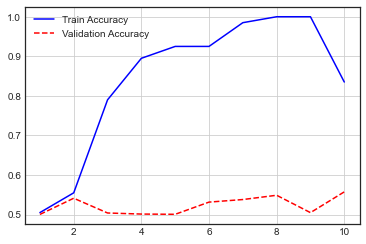

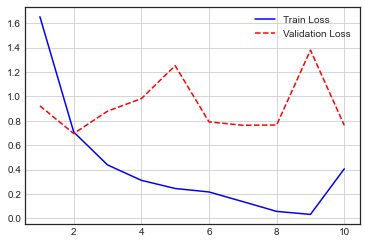

In [158]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'b-', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r--', label = 'Validation Accuracy')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b-', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r--', label = 'Validation Loss')
plt.grid()
plt.legend()

plt.show()

## 사전 훈련된 단어 임베딩을 사용하지 않고 같은 모델 훈련

In [159]:
model2 = Sequential()

model2.add(Embedding(max_words, embedding_dim, input_length = max_len))
model2.add(Flatten())
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [160]:
model2.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['acc'])

history2 = model2.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))

Epoch 1/10
7/7 [==============================] - 1s 142ms/step - loss: 0.6890 - acc: 0.5050 - val_loss: 0.6958 - val_acc: 0.5078
Epoch 2/10
7/7 [==============================] - 1s 126ms/step - loss: 0.5156 - acc: 0.9850 - val_loss: 0.7035 - val_acc: 0.5125
Epoch 3/10
7/7 [==============================] - 1s 123ms/step - loss: 0.3002 - acc: 0.9850 - val_loss: 0.7005 - val_acc: 0.5160
Epoch 4/10
7/7 [==============================] - 1s 120ms/step - loss: 0.1403 - acc: 1.0000 - val_loss: 0.7175 - val_acc: 0.5118
Epoch 5/10
7/7 [==============================] - 1s 114ms/step - loss: 0.0682 - acc: 1.0000 - val_loss: 0.7170 - val_acc: 0.5141
Epoch 6/10
7/7 [==============================] - 1s 123ms/step - loss: 0.0353 - acc: 1.0000 - val_loss: 0.7129 - val_acc: 0.5190
Epoch 7/10
7/7 [==============================] - 1s 123ms/step - loss: 0.0193 - acc: 1.0000 - val_loss: 0.7466 - val_acc: 0.5135
Epoch 8/10
7/7 [==============================] - 1s 112ms/step - loss: 0.0112 - acc: 1.00

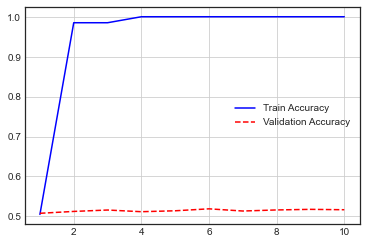

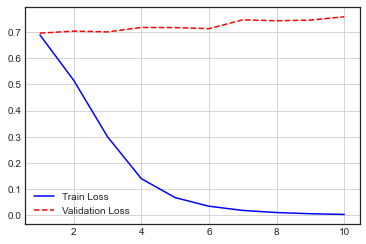

In [161]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
acc = history2.history['acc']
val_acc = history2.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'b-', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r--', label = 'Validation Accuracy')
plt.grid()
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b-', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r--', label = 'Validation Loss')
plt.grid()
plt.legend()

plt.show()


### OverFitting

### 테스트 데이터 토큰화

In [162]:
test_dir = os.path.join(imdb_dir, 'test')


labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = 'utf8')
            texts.append(f.read())
            f.close()
            
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)
                
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen = max_len)
y_test = np.asarray(labels)

In [163]:
print(x_test.shape)
print(y_test.shape)

(25000, 100)
(25000,)


In [164]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7643 - acc: 0.5534


[0.7643107175827026, 0.5534399747848511]